In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/life-longevity-factors/LiveLongerData.csv')
df.head(10)

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect,Comment,Note,ID,Sources,Links
0,Smoking,-10.0,strong,3,Both,negative,10 years gained (against those who continue to...,14 if combined with exercise and eating health...,1,"Khaw KT, et al. (2008). Combined impact of hea...",http://www.washingtonpost.com/wp-dyn/articles/...
1,Sitting Down,-3.0,suggestive,1,Both,negative,for 8-11 hours sitting a day,"No matter how much you exercise, sitting too m...",2,Sydney School of Public Health research paper ...,http://www.ncbi.nlm.nih.gov/pubmed/22450936
2,Too much sleeping,-1.5,suggestive,1,Both,negative,"7 hours ideal, no more than 8 hrs a night",Averaging more than 8 hours sleep a night will...,3,New Scientist,http://www.newscientist.com/article/dn1928-sev...
3,More Optimism,2.0,suggestive,1,Female,positive,& faith in fellow humans. calc takes average %...,Women within the highest 25% of optimism score...,4,"Source: Hilary A. Tindle, M.D., assistant prof...",www.nlm.nih.gov/medlineplus/news/fullstory_879...
4,More Pets,3.0,good,2,Both,positive,particularly for elderly. calc assumes that he...,(1) Cats - According to a study by the Minneso...,5,Medical News Today; National Center for Biotec...,http://www.medicalnewstoday.com/articles/98432...
5,more professional responsibility,3.5,suggestive,1,Male,positive,higher and managerial professionals live longe...,"At age 65, LE of males (2002-06) classified by...",6,Longevity Science Advisory Panel,http://www.longevitypanel.co.uk/docs/life-expe...
6,Healthy Eating,7.0,strong,3,Both,positive,Japanese / Mediterannean diet will lengthen li...,Figure given for Mediterannean diet. JAPANESE:...,7,Amazon (book) The Okinawa Program : How the Wo...,http://www.amazon.com/Okinawa-Program-Longest-...
7,Red Meat,-1.0,good,2,Both,positive,NaN,risk of dying in a given year increases by 13%...,8,BBC News,http://www.bbc.co.uk/news/magazine-17389938
8,Alcohol (heavy abuse),-11.0,good,2,Both,positive,a lot is bad,Alcoholism reduces life expectancy by about 10...,9,New York Times,http://health.nytimes.com/health/guides/diseas...
9,City living,-2.5,suggestive,1,Both,positive,or living near a busy road,According to a Canada’s McMaster University st...,10,2004 study by Murray Finkelstein @ Canada McMa...,http://aje.oxfordjournals.org/content/160/2/17...


In [3]:
df.columns

Index(['Factor', 'Years gained / lost', 'strength of science?',
       'strength of science as a number', 'sexes affected', 'effect',
       'Comment', 'Note', 'ID', 'Sources', 'Links'],
      dtype='object')

In [4]:
df = df.drop('ID', axis=1)

In [5]:
df.describe()

,Years gained / lost,strength of science as a number
count,35.000000,35.000000
mean,3.243143,1.771429
std,8.126155,0.877353
min,-25.000000,1.000000
25%,1.070000,1.000000
50%,3.500000,1.000000
75%,7.750000,3.000000
max,15.000000,3.000000


In [6]:
print(df.groupby('sexes affected')['Years gained / lost'].describe())

                               count     mean       std   min     25%    50%  \
sexes affected                                                                 
Both                            25.0   2.3444  9.183643 -25.0  -1.500   3.00   
Both but especially for women    1.0   7.0000       NaN   7.0   7.000   7.00   
Both, but esp. for men           1.0   2.0000       NaN   2.0   2.000   2.00   
Female                           2.0   3.5500  2.192031   2.0   2.775   3.55   
Male                             5.0   4.7600  2.759167   2.0   3.500   4.00   
male                             1.0  15.0000       NaN  15.0  15.000  15.00   

                                  75%   max  
sexes affected                               
Both                            8.000  15.0  
Both but especially for women   7.000   7.0  
Both, but esp. for men          2.000   2.0  
Female                          4.325   5.1  
Male                            5.000   9.3  
male                           15.000

In [7]:
print(df['strength of science?'].unique())
print(df['sexes affected'].unique())
print(df['effect'].unique())

['strong' 'suggestive' 'good']
['Both' 'Female' 'Male' 'Both, but esp. for men' 'male'
 'Both but especially for women']
['negative' 'positive']


In [8]:
#Occurrences of each unique value
print(df['strength of science?'].value_counts())
print(df['sexes affected'].value_counts())
print(df['effect'].value_counts())

suggestive    18
strong        10
good           7
Name: strength of science?, dtype: int64
Both                             25
Male                              5
Female                            2
Both, but esp. for men            1
male                              1
Both but especially for women     1
Name: sexes affected, dtype: int64
positive    31
negative     4
Name: effect, dtype: int64


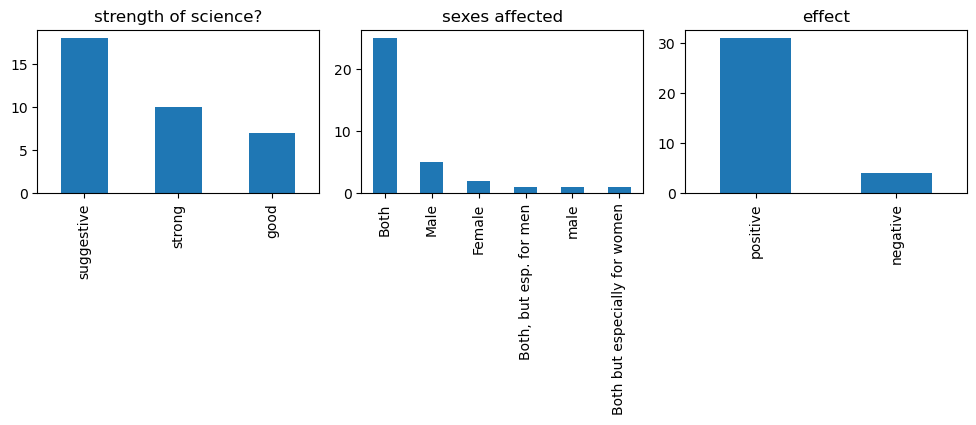

In [9]:
# Visualize the counts
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

df['strength of science?'].value_counts().plot.bar(ax=axes[0])
df['sexes affected'].value_counts().plot.bar(ax=axes[1])
df['effect'].value_counts().plot.bar(ax=axes[2]) 

plt.xticks(rotation=90)
plt.tight_layout()
fig.subplots_adjust(top=0.8)

# Add column names  
axes[0].set_title('strength of science?')
axes[1].set_title('sexes affected') 
axes[2].set_title('effect')

plt.show()

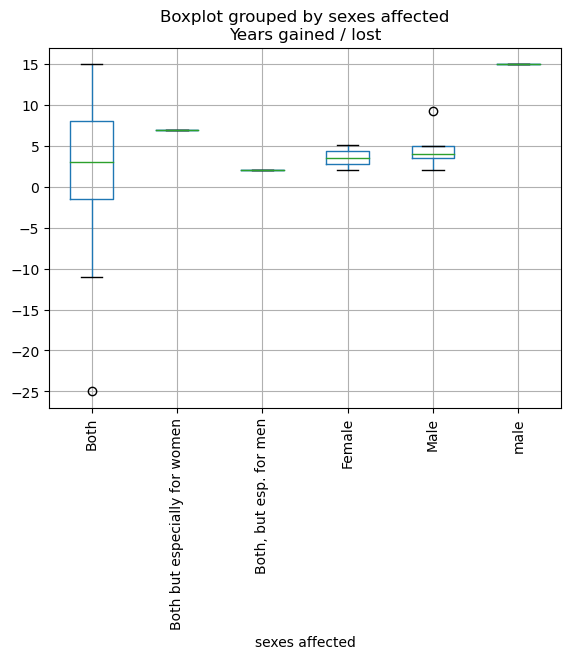

In [10]:
# Plot the distribution of 'Years gained / lost' by 'sexes affected'
df.boxplot(column='Years gained / lost', by='sexes affected')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Look for correlations between categorical columns
print(df.groupby('strength of science?')['effect'].value_counts())
print(df.groupby('sexes affected')['effect'].value_counts())

strength of science?  effect  
good                  positive     7
strong                positive     8
                      negative     2
suggestive            positive    16
                      negative     2
Name: effect, dtype: int64
sexes affected                 effect  
Both                           positive    21
                               negative     4
Both but especially for women  positive     1
Both, but esp. for men         positive     1
Female                         positive     2
Male                           positive     5
male                           positive     1
Name: effect, dtype: int64


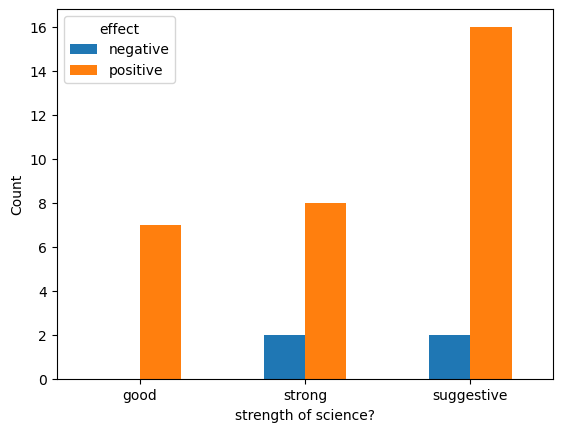

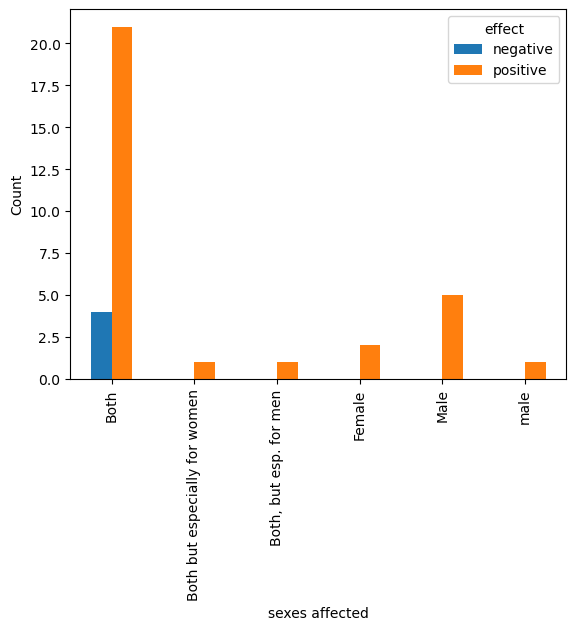

In [12]:
# Strength of science 
strength_counts = df.groupby('strength of science?')['effect'].value_counts()
strength_counts = strength_counts.unstack(level=1)
ax = strength_counts.plot.bar(rot=0)
ax.set_ylabel('Count')

# Sexes affected
sex_counts = df.groupby('sexes affected')['effect'].value_counts()
sex_counts = sex_counts.unstack(level=1)
ax = sex_counts.plot.bar(rot=0)
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Perform chi-square test for independence between categorical columns
chi_square = chi2_contingency(pd.crosstab(df['strength of science?'], df['effect']))
print(chi_square)

(1.630824372759857, 0.4424569150559088, 2, array([[ 0.8       ,  6.2       ],
       [ 1.14285714,  8.85714286],
       [ 2.05714286, 15.94285714]]))


- chi-square statistic: 1.630824372759857
- p-value: 0.4424569150559088
- Degrees of freedom: 2
- Contingency table counts

With a large p-value > 0.05, we fail to reject the null hypothesis of independence. So there is no evidence of a statistically significant association between strength of science and effect based on this test.

As for the contingency table we can interpret it as follows:

For 'good' strength, 0 negative and 6 positive effects
For 'strong', 1 negative and 8 positive
For 'suggestive', 2 negative and 15 positive

Visually the table suggests some possible association, but due to the small counts we can say that there is no statistically significant association detected. 

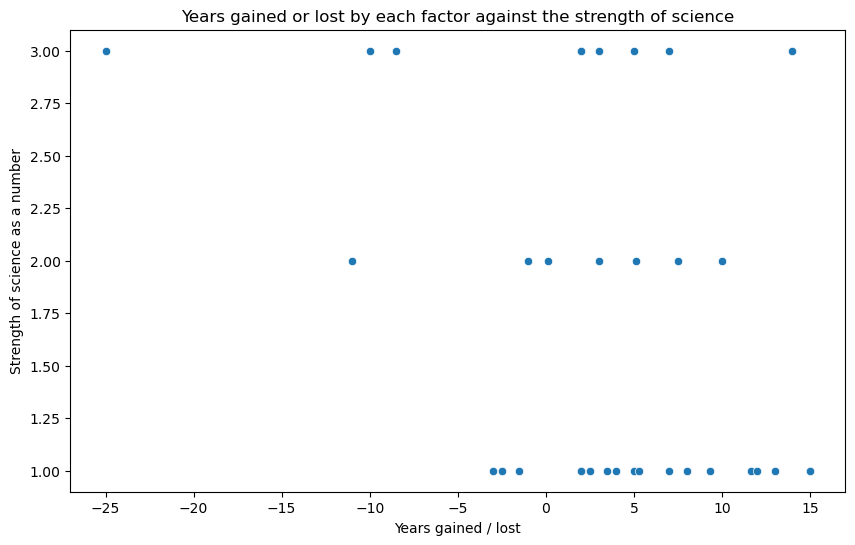

In [14]:
# Plot a scatter plot of the years gained or lost by each factor against the strength of science
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Years gained / lost',
    y='strength of science as a number',
    data=df
)
plt.xlabel('Years gained / lost')
plt.ylabel('Strength of science as a number')
plt.title('Years gained or lost by each factor against the strength of science')
plt.show()

In [15]:
corr, p_value = stats.pearsonr(df['Years gained / lost'], df['strength of science as a number'])

print("Correlation:", corr) 
print("P-value:", p_value)

Correlation: -0.3746851284683745
P-value: 0.026578576136280452


The Pearson correlation coefficient between the two variables is -0.375 (≈ -0.3746851284683745), indicating a weak negative correlation.

The p-value from the correlation test is 0.027 (≈ 0.026578576136280452), which is below the 0.05 significance level.

Therefore, we can conclude there is a statistically significant negative correlation between the strength of science and the years gained/lost for the lifestyle factors in this dataset.

The negative correlation indicates that factors with a higher strength of science rating tend to be associated with fewer years gained or more years lost. However, the correlation is only -0.375 suggesting a weak relationship. The strength of science does not strongly predict the effect size. There are outliers that have large positive effect but only a moderate or even low strength rating.

The significant p-value suggests this negative relationship is unlikely due to chance alone.
In summary, while the correlation is statistically significant, the relationship between strength and effect size is fairly weak in this dataset.

         Years gained / lost  strength of science as a number
cluster                                                      
0                   2.028421                         1.736842
1                 -13.625000                         2.750000
2                  10.789167                         1.500000


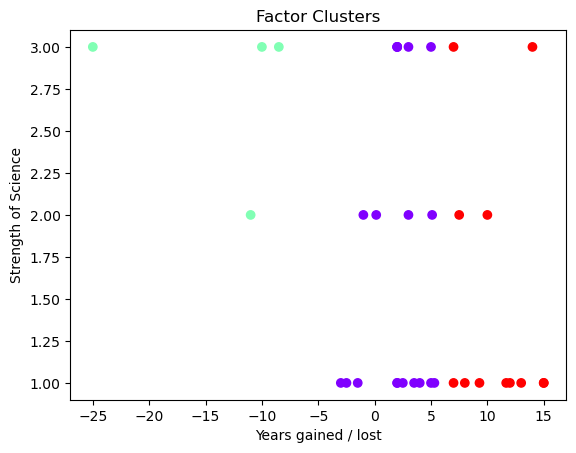

In [16]:
# Select features to cluster on 
features = ['Years gained / lost', 'strength of science as a number']
X = df[features]

# K-means clustering 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

# Plot clusters
plt.scatter(X['Years gained / lost'], X['strength of science as a number'], 
            c=df['cluster'], cmap='rainbow')
plt.xlabel('Years gained / lost')
plt.ylabel('Strength of Science')
plt.title('Factor Clusters')

# Print cluster details
print(df.groupby('cluster').mean())

In [17]:
# Print factor column grouped by cluster
print(df.groupby('cluster')['Factor'].value_counts())

cluster  Factor                                                    
0        A little alcohol                                              1
         A little exercise                                             1
         A little wine                                                 1
         City living                                                   1
         Good genetics                                                 1
         Living at high altitude                                       1
         More Exercise                                                 1
         More Health Checks #2                                         1
         More Optimism                                                 1
         More Pets                                                     1
         More close Friends                                            1
         More conscientious & stable                                   1
         Orgasms                                        

|Group | Years gained / lost | Strength of science as a number |  
|---|---|---|
|  1 | 10.789167 | 1.500000 |
|  2 | -13.625000 | 2.750000 | 
|  3 | 2.028421 | 1.736842 |   

*For matching the groups with the clusters take a look on the output of the k-means clustering cell* 

**Group 1**: This cluster has the highest average years gained and the lowest average strength of science. This suggests that this cluster is made up of factors that have a positive impact on lifespan but are not well-supported by scientific evidence. Some examples of factors in this cluster are polygamy, meditation, more money, and faith.

**Group 2**: This cluster has the most years lost and the highest average strength of science. This suggests that this cluster is made up of factors that have a strong negative impact on lifespan and are supported by strong scientific evidence. The factors belonging in this cluster are smoking, excessive alcohol consumption, obesity and mental illness.

**Group 3**: This cluster has the lowest average years gained and the highest average strength of science. This suggests that this cluster is made up of factors that have a small positive impact on lifespan and are moderately supported by scientific evidence.Some examples of factors in this cluster are exercise, sleep, genetics, and regular health checkups.